In [1]:
# Cell 1: Setup and Imports
"""
01_eda_platform.ipynb - Exploratory Data Analysis

Purpose:
    Analyze all loaded data (beneficiaries, claims) to understand:
    - Data distributions
    - Missing values
    - Outliers
    - Relationships between variables
    - Data quality issues

This guides our cleaning strategy in notebook 02.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("EDA Environment Setup Complete")


EDA Environment Setup Complete


In [2]:
# Cell 2: Load Data from interim/
"""
Load processed data from make_dataset.py output
"""

# Define paths
PROJECT_ROOT = Path.cwd().parent
INTERIM_PATH = PROJECT_ROOT / 'data' / 'interim'

# Load data
print("Loading data from interim/...")
beneficiaries = pd.read_parquet(INTERIM_PATH / 'beneficiaries.parquet')
inpatient = pd.read_parquet(INTERIM_PATH / 'inpatient_claims.parquet')
outpatient = pd.read_parquet(INTERIM_PATH / 'outpatient_claims.parquet')

print(f"✓ Beneficiaries: {beneficiaries.shape}")
print(f"✓ Inpatient Claims: {inpatient.shape}")
print(f"✓ Outpatient Claims: {outpatient.shape}")


Loading data from interim/...
✓ Beneficiaries: (116352, 32)
✓ Inpatient Claims: (66773, 81)
✓ Outpatient Claims: (790790, 76)


In [3]:
# Cell 3: Beneficiary Data Overview
"""
Understand beneficiary demographics and enrollment
"""

print("=" * 70)
print("BENEFICIARY DATA OVERVIEW")
print("=" * 70)

print("\nDataset Shape:")
print(f"Rows: {len(beneficiaries):,}")
print(f"Columns: {len(beneficiaries.columns)}")

print("\nColumn Names:")
print(beneficiaries.columns.tolist())

print("\nFirst 5 Rows:")
display(beneficiaries.head())

print("\nData Types:")
display(beneficiaries.dtypes.value_counts())

print("\nMemory Usage:")
print(f"{beneficiaries.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


BENEFICIARY DATA OVERVIEW

Dataset Shape:
Rows: 116,352
Columns: 32

Column Names:
['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD', 'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS', 'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA', 'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP', 'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR']

First 5 Rows:


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0033C90574583C0D,19360801,20080901.0,2,1,0,49,770,12,12,0,12,2,2,2,2,2,2,1,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,860.0,290.0,0.0
1,00521D781532612C,19370801,20080701.0,2,1,0,51,160,12,12,12,12,1,2,2,2,2,1,1,1,2,1,2,0.0,0.0,0.0,530.0,110.0,0.0,470.0,60.0,0.0
2,00653DC86A0E30D8,19490601,20080501.0,1,3,0,33,610,12,12,0,0,2,1,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,006D438FFACFB5FD,19200601,20080101.0,2,2,0,5,470,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0083EA0267C0F7CA,19351201,20080201.0,1,1,0,33,331,12,12,0,12,2,1,2,2,2,2,1,2,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Data Types:


int64      20
float64    10
object      2
Name: count, dtype: int64


Memory Usage:
39.39 MB


MISSING VALUE ANALYSIS

Columns with Missing Values:


,column,missing_count,missing_pct
BENE_DEATH_DT,BENE_DEATH_DT,110891,95.31


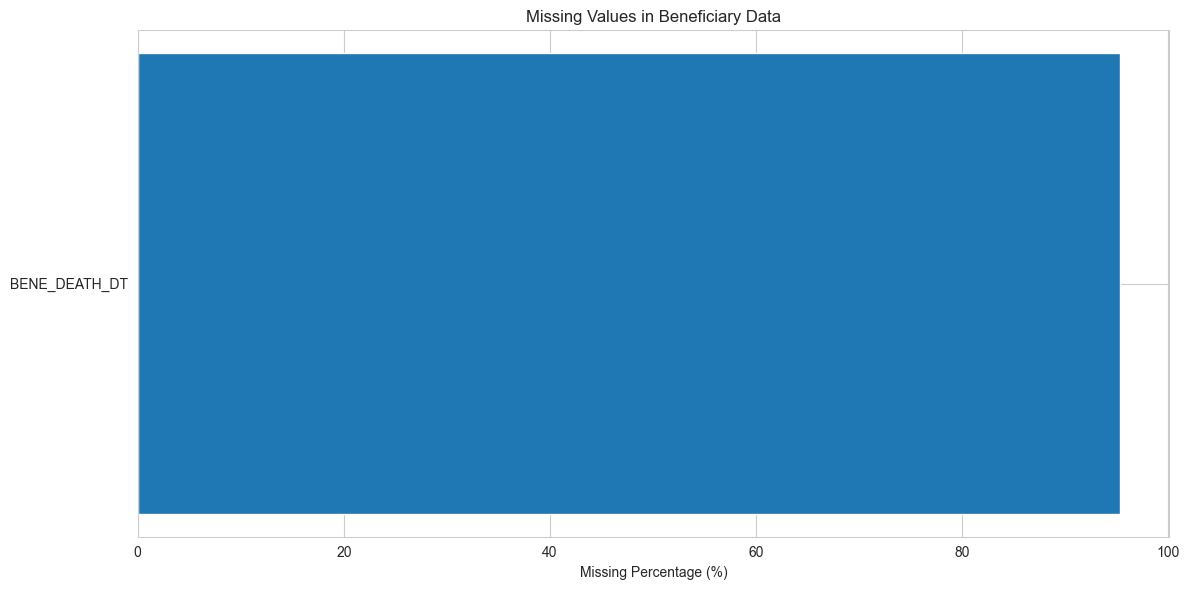

In [4]:
# Cell 4: Missing Value Analysis
"""
Identify columns with missing data
"""

print("=" * 70)
print("MISSING VALUE ANALYSIS")
print("=" * 70)

# Calculate missing percentages
missing = pd.DataFrame({
    'column': beneficiaries.columns,
    'missing_count': beneficiaries.isnull().sum(),
    'missing_pct': (beneficiaries.isnull().sum() / len(beneficiaries) * 100).round(2)
})

missing = missing[missing['missing_count'] > 0].sort_values('missing_pct', ascending=False)

print("\nColumns with Missing Values:")
display(missing)

# Visualize missing data
if not missing.empty:
    plt.figure(figsize=(12, 6))
    plt.barh(missing['column'], missing['missing_pct'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values in Beneficiary Data')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in beneficiaries!")


DEMOGRAPHIC ANALYSIS

Gender Distribution:
BENE_SEX_IDENT_CD
2    64347
1    52005
Name: count, dtype: int64


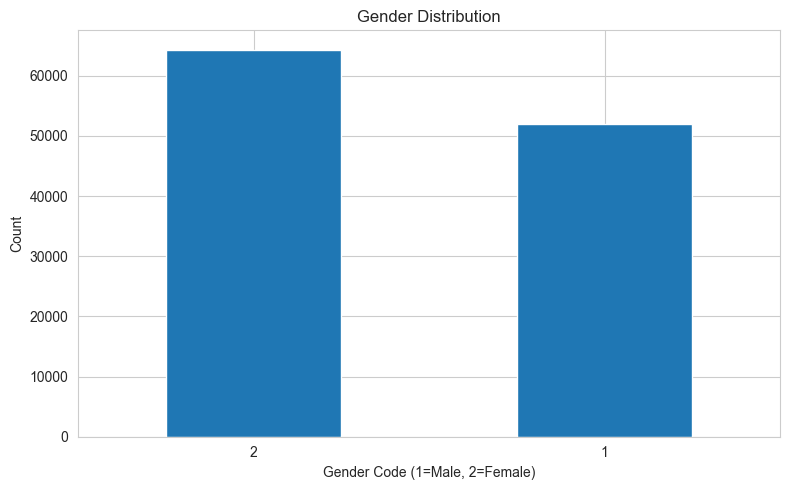


Age Analysis:
count    116352.000000
mean         74.186284
std          12.508645
min          27.082820
25%          68.835044
50%          74.666667
75%          82.162902
max         101.995893
Name: age, dtype: float64


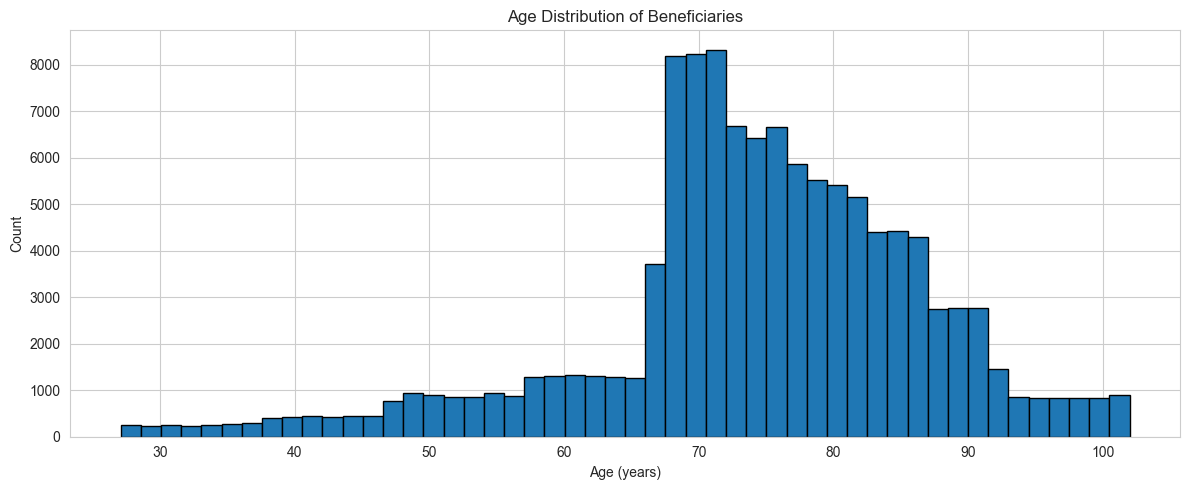


Race Distribution:
BENE_RACE_CD
1    96349
2    12343
3     4931
5     2729
Name: count, dtype: int64


In [5]:
# Cell 5: Demographic Analysis
"""
Analyze member demographics
"""

print("=" * 70)
print("DEMOGRAPHIC ANALYSIS")
print("=" * 70)

# Gender distribution (if exists)
if 'BENE_SEX_IDENT_CD' in beneficiaries.columns:
    print("\nGender Distribution:")
    gender_dist = beneficiaries['BENE_SEX_IDENT_CD'].value_counts()
    print(gender_dist)
    
    plt.figure(figsize=(8, 5))
    gender_dist.plot(kind='bar')
    plt.title('Gender Distribution')
    plt.xlabel('Gender Code (1=Male, 2=Female)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Age distribution (calculate from birth date if exists)
if 'BENE_BIRTH_DT' in beneficiaries.columns:
    print("\nAge Analysis:")
    
    # Convert to datetime
    beneficiaries['BENE_BIRTH_DT'] = pd.to_datetime(beneficiaries['BENE_BIRTH_DT'], format='%Y%m%d', errors='coerce')
    
    # Calculate age (as of 2010)
    reference_date = pd.Timestamp('2010-12-31')
    beneficiaries['age'] = (reference_date - beneficiaries['BENE_BIRTH_DT']).dt.days / 365.25
    
    print(beneficiaries['age'].describe())
    
    plt.figure(figsize=(12, 5))
    plt.hist(beneficiaries['age'].dropna(), bins=50, edgecolor='black')
    plt.xlabel('Age (years)')
    plt.ylabel('Count')
    plt.title('Age Distribution of Beneficiaries')
    plt.tight_layout()
    plt.show()

# Race distribution (if exists)
if 'BENE_RACE_CD' in beneficiaries.columns:
    print("\nRace Distribution:")
    race_dist = beneficiaries['BENE_RACE_CD'].value_counts()
    print(race_dist)


In [7]:
# Cell 6: Chronic Conditions Analysis
"""
Analyze chronic disease prevalence
"""

print("=" * 70)
print("CHRONIC CONDITIONS ANALYSIS")
print("=" * 70)

# Identify chronic condition columns
chronic_cols = [col for col in beneficiaries.columns if 'CHRONIC' in col or '_SP_' in col]

if chronic_cols:
    print(f"\nFound {len(chronic_cols)} chronic condition indicators")
    
    # Calculate prevalence
    chronic_prevalence = beneficiaries[chronic_cols].apply(lambda x: (x == 1).sum() / len(x) * 100)
    chronic_prevalence = chronic_prevalence.sort_values(ascending=False)
    
    print("\nChronic Condition Prevalence (%):")
    display(chronic_prevalence.head(10))
    
    # Visualize top 10
    plt.figure(figsize=(12, 6))
    chronic_prevalence.head(10).plot(kind='barh')
    plt.xlabel('Prevalence (%)')
    plt.title('Top 10 Chronic Conditions')
    plt.tight_layout()
    plt.show()
    
    # Count conditions per member
    beneficiaries['num_chronic_conditions'] = beneficiaries[chronic_cols].sum(axis=1)
    
    print("\nNumber of Chronic Conditions per Member:")
    print(beneficiaries['num_chronic_conditions'].describe())
    
    plt.figure(figsize=(10, 5))
    beneficiaries['num_chronic_conditions'].value_counts().sort_index().plot(kind='bar')
    plt.xlabel('Number of Chronic Conditions')
    plt.ylabel('Number of Members')
    plt.title('Distribution of Chronic Condition Count')
    plt.tight_layout()
    plt.show()


CHRONIC CONDITIONS ANALYSIS


DEATH/CHURN ANALYSIS

Churn Rate: 4.69%
Churned Members: 5,461
Active Members: 110,891


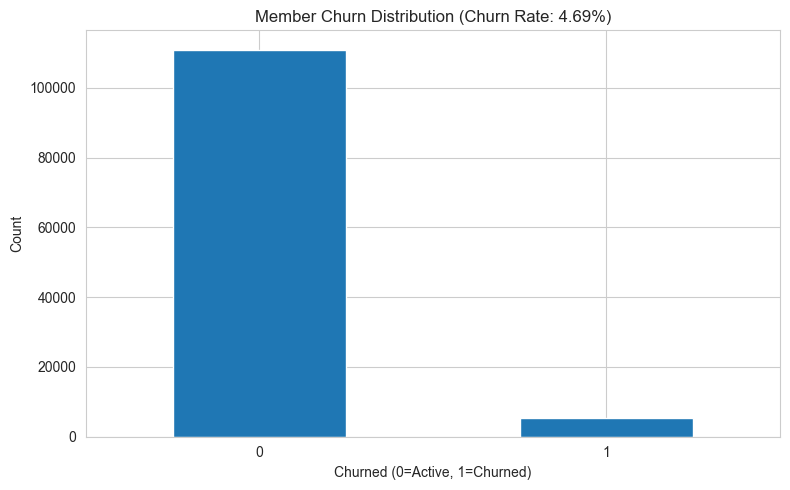

<Figure size 1200x500 with 0 Axes>

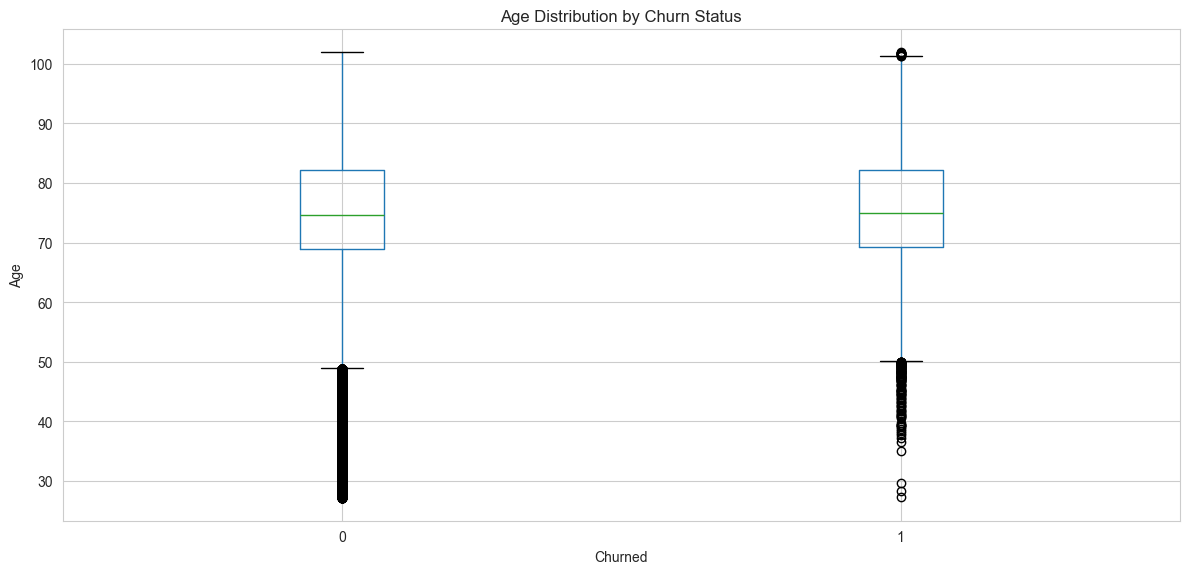

In [8]:
# Cell 7: Death Analysis (Churn Target)
"""
Analyze mortality/churn patterns
"""

print("=" * 70)
print("DEATH/CHURN ANALYSIS")
print("=" * 70)

if 'BENE_DEATH_DT' in beneficiaries.columns:
    # Create churn indicator
    beneficiaries['churned'] = beneficiaries['BENE_DEATH_DT'].notna().astype(int)
    
    churn_rate = beneficiaries['churned'].mean() * 100
    print(f"\nChurn Rate: {churn_rate:.2f}%")
    print(f"Churned Members: {beneficiaries['churned'].sum():,}")
    print(f"Active Members: {(beneficiaries['churned'] == 0).sum():,}")
    
    # Visualize
    plt.figure(figsize=(8, 5))
    beneficiaries['churned'].value_counts().plot(kind='bar')
    plt.xlabel('Churned (0=Active, 1=Churned)')
    plt.ylabel('Count')
    plt.title(f'Member Churn Distribution (Churn Rate: {churn_rate:.2f}%)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Churn by age
    if 'age' in beneficiaries.columns:
        plt.figure(figsize=(12, 5))
        beneficiaries.boxplot(column='age', by='churned')
        plt.suptitle('')
        plt.title('Age Distribution by Churn Status')
        plt.xlabel('Churned')
        plt.ylabel('Age')
        plt.tight_layout()
        plt.show()


INPATIENT CLAIMS ANALYSIS

Total Inpatient Claims: 66,773
Unique Members with Inpatient Claims: 37,780
Columns: 81

Claims per Member:
count    37780.000000
mean         1.767417
std          1.265945
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
dtype: float64


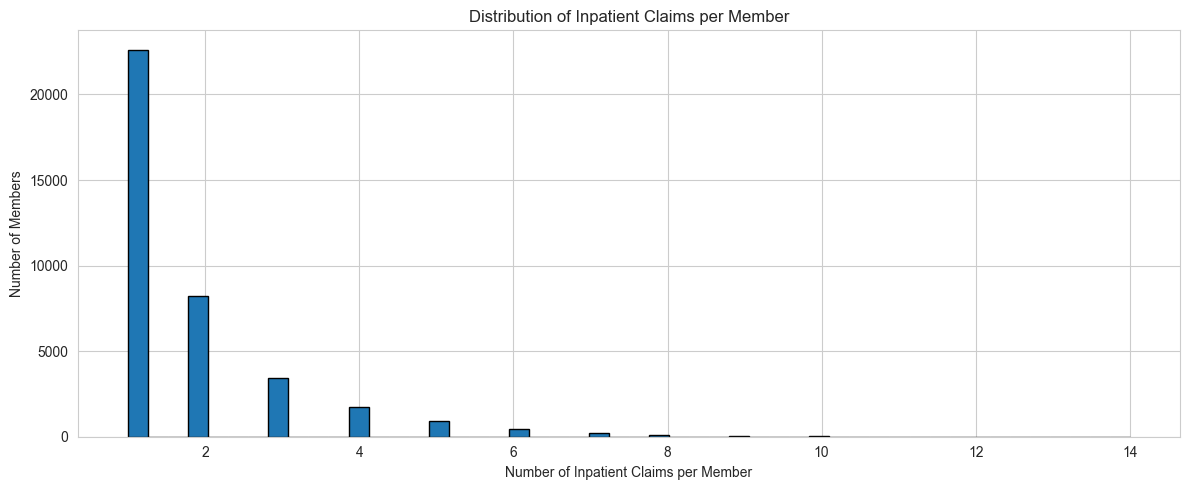


OUTPATIENT CLAIMS ANALYSIS

Total Outpatient Claims: 790,790
Unique Members with Outpatient Claims: 85,272

Claims per Member:
count    85272.000000
mean         9.273736
std          8.218273
min          1.000000
25%          3.000000
50%          7.000000
75%         13.000000
max         78.000000
dtype: float64


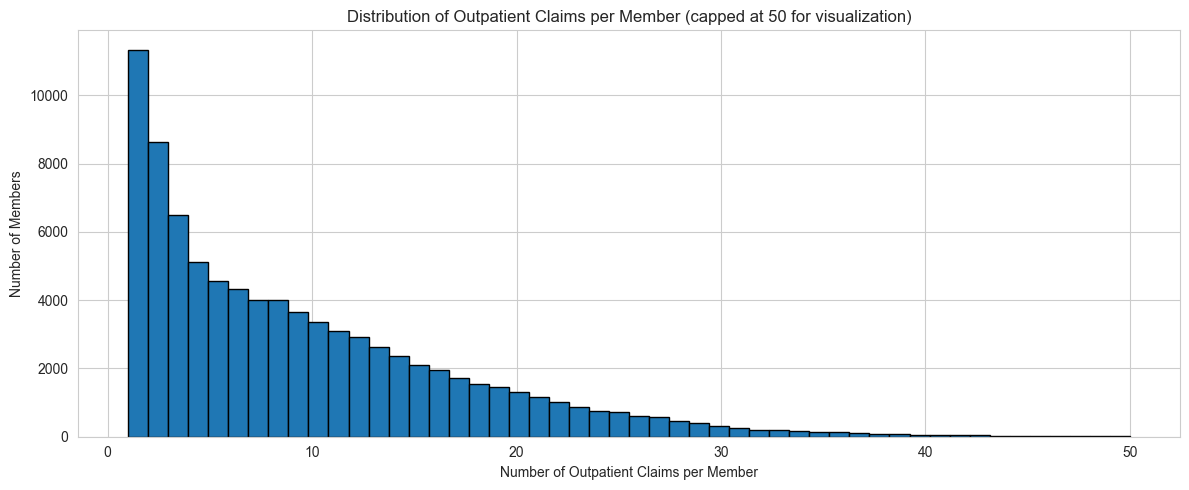

In [9]:
# Cell 8: Claims Data Overview
"""
Analyze claims patterns
"""

print("=" * 70)
print("INPATIENT CLAIMS ANALYSIS")
print("=" * 70)

print(f"\nTotal Inpatient Claims: {len(inpatient):,}")
print(f"Unique Members with Inpatient Claims: {inpatient['DESYNPUF_ID'].nunique():,}")
print(f"Columns: {len(inpatient.columns)}")

print("\nClaims per Member:")
claims_per_member = inpatient.groupby('DESYNPUF_ID').size()
print(claims_per_member.describe())

plt.figure(figsize=(12, 5))
plt.hist(claims_per_member, bins=50, edgecolor='black')
plt.xlabel('Number of Inpatient Claims per Member')
plt.ylabel('Number of Members')
plt.title('Distribution of Inpatient Claims per Member')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("OUTPATIENT CLAIMS ANALYSIS")
print("=" * 70)

print(f"\nTotal Outpatient Claims: {len(outpatient):,}")
print(f"Unique Members with Outpatient Claims: {outpatient['DESYNPUF_ID'].nunique():,}")

print("\nClaims per Member:")
out_claims_per_member = outpatient.groupby('DESYNPUF_ID').size()
print(out_claims_per_member.describe())

plt.figure(figsize=(12, 5))
plt.hist(out_claims_per_member[out_claims_per_member <= 50], bins=50, edgecolor='black')
plt.xlabel('Number of Outpatient Claims per Member')
plt.ylabel('Number of Members')
plt.title('Distribution of Outpatient Claims per Member (capped at 50 for visualization)')
plt.tight_layout()
plt.show()


COST ANALYSIS

Inpatient Payment Columns: ['CLM_PMT_AMT']

Inpatient Claim Costs:
count    66773.000000
mean      9573.632756
std       9315.073232
min      -8000.000000
25%       4000.000000
50%       7000.000000
75%      11000.000000
max      57000.000000
Name: total_payment, dtype: float64


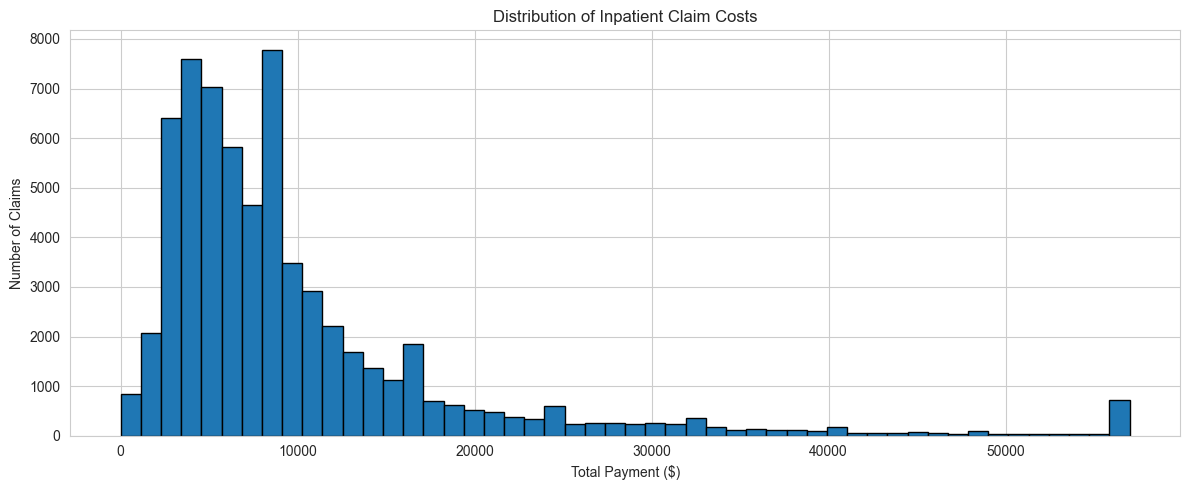


Outpatient Payment Columns: ['CLM_PMT_AMT']

Outpatient Claim Costs:
count    790790.000000
mean        283.924569
std         571.392794
min        -100.000000
25%          40.000000
50%          80.000000
75%         200.000000
max        3300.000000
Name: total_payment, dtype: float64


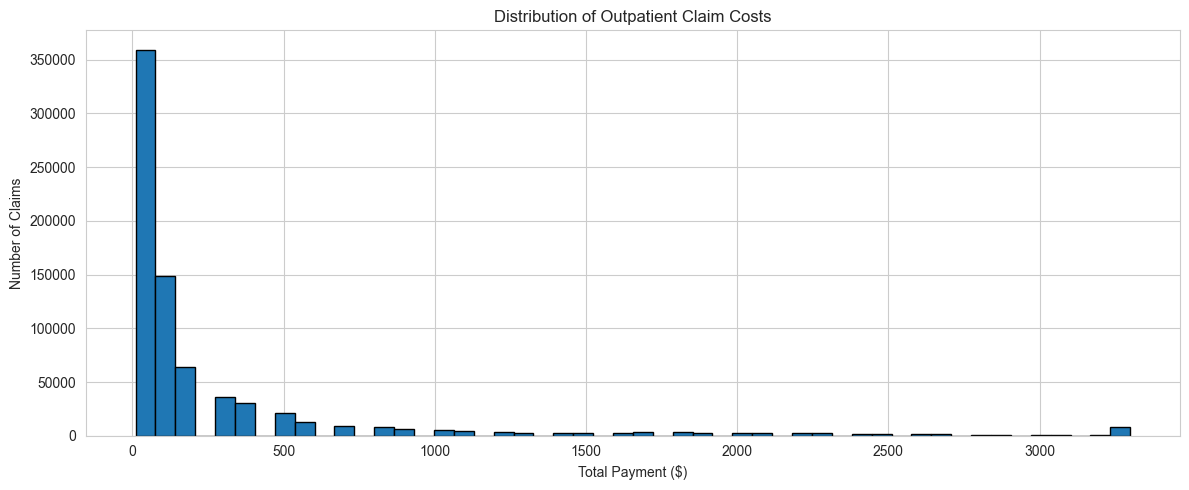

In [10]:
# Cell 9: Cost Analysis
"""
Analyze claim costs
"""

print("=" * 70)
print("COST ANALYSIS")
print("=" * 70)

# Find payment columns
payment_cols_inp = [col for col in inpatient.columns if 'PMT' in col or 'PAYMENT' in col]
payment_cols_out = [col for col in outpatient.columns if 'PMT' in col or 'PAYMENT' in col]

if payment_cols_inp:
    print(f"\nInpatient Payment Columns: {payment_cols_inp[:5]}")
    
    # Calculate total payment per claim (sum of all payment columns)
    inpatient['total_payment'] = inpatient[payment_cols_inp].sum(axis=1)
    
    print("\nInpatient Claim Costs:")
    print(inpatient['total_payment'].describe())
    
    plt.figure(figsize=(12, 5))
    plt.hist(inpatient['total_payment'][inpatient['total_payment'] > 0], bins=50, edgecolor='black')
    plt.xlabel('Total Payment ($)')
    plt.ylabel('Number of Claims')
    plt.title('Distribution of Inpatient Claim Costs')
    plt.tight_layout()
    plt.show()

if payment_cols_out:
    print(f"\nOutpatient Payment Columns: {payment_cols_out[:5]}")
    
    outpatient['total_payment'] = outpatient[payment_cols_out].sum(axis=1)
    
    print("\nOutpatient Claim Costs:")
    print(outpatient['total_payment'].describe())
    
    plt.figure(figsize=(12, 5))
    plt.hist(outpatient['total_payment'][outpatient['total_payment'] > 0], bins=50, edgecolor='black')
    plt.xlabel('Total Payment ($)')
    plt.ylabel('Number of Claims')
    plt.title('Distribution of Outpatient Claim Costs')
    plt.tight_layout()
    plt.show()


In [11]:
# Cell 10: Data Quality Summary
"""
Summarize findings for cleaning strategy
"""

print("=" * 70)
print("EDA SUMMARY - KEY FINDINGS")
print("=" * 70)

print("\n1. DATA VOLUMES:")
print(f"   - Beneficiaries: {len(beneficiaries):,}")
print(f"   - Inpatient Claims: {len(inpatient):,}")
print(f"   - Outpatient Claims: {len(outpatient):,}")

print("\n2. MISSING DATA:")
if not missing.empty:
    print(f"   - Columns with missing values: {len(missing)}")
    print(f"   - Highest missing rate: {missing.iloc[0]['column']} ({missing.iloc[0]['missing_pct']}%)")
else:
    print("   - No missing values in beneficiaries")

print("\n3. CHURN RATE:")
if 'churned' in beneficiaries.columns:
    print(f"   - {beneficiaries['churned'].mean() * 100:.2f}%")

print("\n4. CHRONIC CONDITIONS:")
if 'num_chronic_conditions' in beneficiaries.columns:
    print(f"   - Average per member: {beneficiaries['num_chronic_conditions'].mean():.1f}")

print("\n5. CLAIMS PATTERNS:")
print(f"   - Avg inpatient claims per member: {claims_per_member.mean():.1f}")
print(f"   - Avg outpatient claims per member: {out_claims_per_member.mean():.1f}")

print("\n" + "=" * 70)
print("NEXT STEP: Use these insights for data cleaning in 02_data_cleaning.ipynb")
print("=" * 70)


EDA SUMMARY - KEY FINDINGS

1. DATA VOLUMES:
   - Beneficiaries: 116,352
   - Inpatient Claims: 66,773
   - Outpatient Claims: 790,790

2. MISSING DATA:
   - Columns with missing values: 1
   - Highest missing rate: BENE_DEATH_DT (95.31%)

3. CHURN RATE:
   - 4.69%

4. CHRONIC CONDITIONS:

5. CLAIMS PATTERNS:
   - Avg inpatient claims per member: 1.8
   - Avg outpatient claims per member: 9.3

NEXT STEP: Use these insights for data cleaning in 02_data_cleaning.ipynb
